In [1]:
import pandas as pd
import numpy as np
import torch.nn as nn
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [2]:
df=pd.read_csv('total.csv',index_col=0)
col=['Date','Close','Company']
df=df[col]
df.head()

Date       Close Company
0  01-03  181.259918   apple
1  01-04  178.959442   apple
2  01-05  174.199158   apple
3  01-06  171.291183   apple
4  01-07  171.460495   apple

In [3]:
stock_list=(df['Company'].unique())
df_close=df.pivot_table(index = 'Date', columns = 'Company', values='Close').dropna(axis=1).drop(columns='nasdq')
df_close.head(6)

Company         amd       apple          ba        biib         jpm  \
Date                                                                  
01-03    150.240005  181.259918  207.860001  244.139999  156.752396   
01-04    144.419998  178.959442  213.630005  241.729996  162.694855   
01-05    136.149994  174.199158  213.070007  239.270004  159.720444   
01-06    136.229996  171.291183  211.339996  237.300003  161.417328   
01-07    132.000000  171.460495  215.500000  232.600006  163.016678   
01-10    132.000000  171.480408  209.309998  235.309998  163.172714   

Company        meta        ngg        pdd       ryaay       tesla  
Date                                                               
01-03    338.540009  70.250885  56.099998  106.440002  399.926666  
01-04    336.529999  70.386894  49.820000  109.050003  383.196655  
01-05    324.170013  69.706833  48.529999  110.250000  362.706665  
01-06    332.459991  69.007339  52.130001  111.599998  354.899994  
01-07    331.790009  69.570824  55.900002  115.989998  342.320007  
01-10    328.070007  69.502815  56.990002  115.970001  352.706665

In [4]:
df_return=df_close.pct_change().dropna()
df_return.head()

Company       amd     apple        ba      biib       jpm      meta       ngg  \
Date                                                                            
01-04   -0.038738 -0.012692  0.027759 -0.009871  0.037910 -0.005937  0.001936   
01-05   -0.057264 -0.026600 -0.002621 -0.010177 -0.018282 -0.036728 -0.009662   
01-06    0.000588 -0.016693 -0.008119 -0.008233  0.010624  0.025573 -0.010035   
01-07   -0.031050  0.000988  0.019684 -0.019806  0.009908 -0.002015  0.008166   
01-10    0.000000  0.000116 -0.028724  0.011651  0.000957 -0.011212 -0.000978   

Company       pdd     ryaay     tesla  
Date                                   
01-04   -0.111943  0.024521 -0.041833  
01-05   -0.025893  0.011004 -0.053471  
01-06    0.074181  0.012245 -0.021523  
01-07    0.072319  0.039337 -0.035447  
01-10    0.019499 -0.000172  0.030342

In [5]:
company_lst = list(df_close.columns)
company_lst

['amd', 'apple', 'ba', 'biib', 'jpm', 'meta', 'ngg', 'pdd', 'ryaay', 'tesla']

# Optimization without modelling

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Company       amd     apple        ba      biib       jpm      meta       ngg  \
Date                                                                            
01-04   -0.038738 -0.012692  0.027759 -0.009871  0.037910 -0.005937  0.001936   
01-05   -0.057264 -0.026600 -0.002621 -0.010177 -0.018282 -0.036728 -0.009662   
01-06    0.000588 -0.016693 -0.008119 -0.008233  0.010624  0.025573 -0.010035   
01-07   -0.031050  0.000988  0.019684 -0.019806  0.009908 -0.002015  0.008166   
01-10    0.000000  0.000116 -0.028724  0.011651  0.000957 -0.011212 -0.000978   

Company       pdd     ryaay     tesla  Portfolio  
Date                                              
01-04   -0.111943  0.024521 -0.041833  -0.012889  
01-05   -0.025893  0.011004 -0.053471  -0.022969  
01-06    0.074181  0.012245 -0.021523   0.005861  
01-07    0.072319  0.039337 -0.035447   0.006208  
01-10    0.019499 -0.000172  0.030342   0.002148  


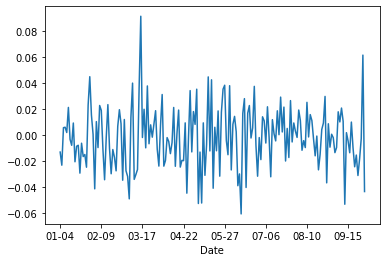

In [6]:
stock_return  = df_return.copy()

# 设置组合权重，存储为numpy数组类型
portfolio_weights = np.array([0.1]*10)
print(portfolio_weights)
# 计算加权的股票收益
WeightedReturns = stock_return.mul(portfolio_weights, axis=1)
# 计算投资组合的收益
df_return['Portfolio'] = WeightedReturns.sum(axis=1)
# 打印前5行数据
print(df_return.head())

# 绘制组合收益随时间变化的图
df_return.Portfolio.plot()
plt.show()

In [12]:
# covariance
cov_mat = stock_return.cov()
# annualised covariance
cov_mat_annual = cov_mat * 252

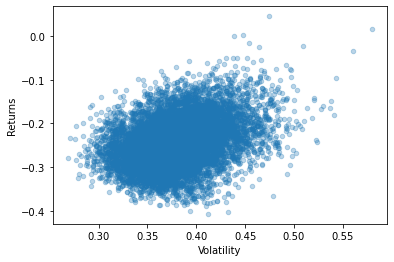

In [14]:
number = 10000
# 设置空的numpy数组，用于存储每次模拟得到的权重、收益率和标准差
random_p = np.empty((number, 12))
# 设置随机数种子，这里是为了结果可重复
np.random.seed(7)

for i in range(number):
    #生成5个随机数，并归一化，得到一组随机的权重数据
    random10=np.random.random(10)
    random_weight=random10/np.sum(random10)
    #计年平均收益率
    mean_return=stock_return.mul(random_weight,axis=1).sum(axis=1).mean()
    annual_return=(1+mean_return)**stock_return.shape[0]-1
    #计算年化标准差，也成为波动率
    random_volatility=np.sqrt(np.dot(random_weight.T,np.dot(cov_mat_annual,random_weight)))
    #将上面生成的权重，和计算得到的收益率、标准差存入数组random_p中
    random_p[i][:10]=random_weight
    random_p[i][10]=annual_return
    random_p[i][11]=random_volatility
#将Numpy数组转化为DataF数据框
RandomPortfolios=pd.DataFrame(random_p)
#设置数据框RandomPortfolios每一列的名称
RandomPortfolios.columns=[company +'_weight' for company in company_lst]+['Returns','Volatility']
#绘制散点图
RandomPortfolios.plot('Volatility','Returns',kind='scatter',alpha=0.3)
plt.show()

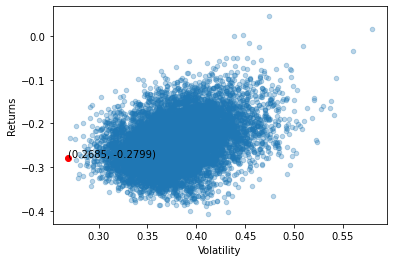

In [15]:
min_index = RandomPortfolios.Volatility.idxmin()

# 在收益-风险散点图中突出风险最小的点
RandomPortfolios.plot('Volatility', 'Returns', kind='scatter', alpha=0.3)
x = RandomPortfolios.loc[min_index,'Volatility']
y = RandomPortfolios.loc[min_index,'Returns']
plt.scatter(x, y, color='red')
#将该点坐标显示在图中并保留四位小数
plt.text(np.round(x,4),np.round(y,4),(np.round(x,4),np.round(y,4)),ha='left',va='bottom',fontsize=10)
plt.show()

In [18]:
numstocks = 10
# 提取最小波动组合对应的权重, 并转换成Numpy数组
GMV_weights = np.array(RandomPortfolios.iloc[min_index, 0:numstocks])
# 计算GMV投资组合收益
df_return['Portfolio_GMV'] = stock_return.mul(GMV_weights, axis=1).sum(axis=1)
#输出风险最小投资组合的权重
print(GMV_weights)

[0.03137463 0.03102828 0.06204414 0.04785487 0.27589317 0.07290348
 0.30801702 0.01418061 0.02344248 0.13326132]


In [19]:
df_return.head()

Company       amd     apple        ba      biib       jpm      meta       ngg  \
Date                                                                            
01-04   -0.038738 -0.012692  0.027759 -0.009871  0.037910 -0.005937  0.001936   
01-05   -0.057264 -0.026600 -0.002621 -0.010177 -0.018282 -0.036728 -0.009662   
01-06    0.000588 -0.016693 -0.008119 -0.008233  0.010624  0.025573 -0.010035   
01-07   -0.031050  0.000988  0.019684 -0.019806  0.009908 -0.002015  0.008166   
01-10    0.000000  0.000116 -0.028724  0.011651  0.000957 -0.011212 -0.000978   

Company       pdd     ryaay     tesla  Portfolio  Portfolio_GMV  
Date                                                             
01-04   -0.111943  0.024521 -0.041833  -0.012889       0.003676  
01-05   -0.025893  0.011004 -0.053471  -0.022969      -0.021204  
01-06    0.074181  0.012245 -0.021523   0.005861      -0.001222  
01-07    0.072319  0.039337 -0.035447   0.006208       0.001656  
01-10    0.019499 -0.000172  0.030342   0.002148       0.002240

## Portfolio VAR/ES based on past data (normal and t distribution)

In [58]:
w = np.array([0.1]*10)
WeightedR = stock_return.mul(w, axis=1)

Return = WeightedR.sum(axis=1)

## Fit Normal
mu_norm, sig_norm = norm.fit(Return) # extract the mean and sigma of the closest normal distribution fit
print("Normal mean is {0:.8f}, sigma is {1:.8f}".format(mu_norm, sig_norm))
dx = 0.0001 # resolution of the distribution
x = np.arange(-1, 1, dx)
pdf_n = norm.pdf(x, mu_norm, sig_norm)

Normal mean is -0.00151238, sigma is 0.02336044


In [59]:
## Fit T
nu, mu_t, sig_t = t.fit(Return)
nu = np.round(nu)
print("Student T mean is {0:.8f}, sigma is {1:.8f}, nu is {2}".format(mu_t, sig_t, nu))
pdf_t = t.pdf(x, nu, mu_t, sig_t)

Student T mean is -0.00168487, sigma is 0.02179103, nu is 16.0


In [60]:
h = 1
alpha = 0.01
xanu = t.ppf(alpha, nu)

CVaR_n = alpha**-1 * norm.pdf(norm.ppf(alpha))*sig_norm - mu_norm
VaR_n = norm.ppf(1-alpha)*sig_norm - mu_norm

VaR_t = np.sqrt((nu-2)/nu) * t.ppf(1-alpha, nu)*sig_norm  - h*mu_norm
CVaR_t = -1/alpha * (1-nu)**(-1) * (nu-2+xanu**2) * t.pdf(xanu, nu)*sig_norm  - h*mu_norm

print("The 99% VaR (Normal) is {0:.2f}%".format(VaR_n*100))
print("The 99% CVaR (Normal) is {0:.2f}%".format(CVaR_n*100))
print("The 99% VaR (Student-t) is {0:.2f}%".format(VaR_t*100))
print("The 99% CVaR (Student-t) is {0:.2f}%".format(CVaR_t*100))

The 99% VaR (Normal) is 5.59%
The 99% CVaR (Normal) is 6.38%
The 99% VaR (Student-t) is 5.80%
The 99% CVaR (Student-t) is 6.68%


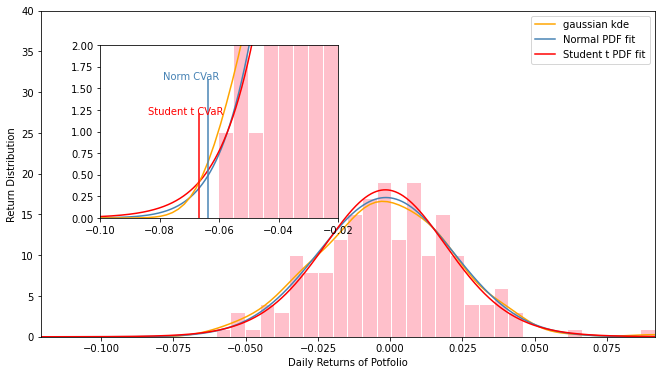

In [61]:
from scipy.stats import gaussian_kde
plt.figure(num=1, figsize=(11, 6))
# main figure
plt.hist(Return, bins=30, color='pink', edgecolor='white')
plt.axis("tight")
kde = gaussian_kde(Return)
xx = np.linspace(-0.1, 0.1, 100)
plt.plot(xx, kde(xx),'orange',label='gaussian kde')
plt.axis("tight")
plt.plot(x, pdf_n, 'steelblue', label="Normal PDF fit")
plt.axis("tight")
plt.plot(x, pdf_t, 'red', label="Student t PDF fit")
plt.xlim([min(Return)*2, max(Return)])
plt.ylim([0, 40])
plt.legend(loc="best")
plt.xlabel("Daily Returns of Potfolio")
plt.ylabel("Return Distribution")
# inset
a = plt.axes([.2, .4, .3, .4])
plt.hist(Return, bins=30, color='pink', edgecolor='white')
plt.plot(x, pdf_n, 'steelblue')
plt.plot(x, pdf_t, 'red')
plt.plot(xx, kde(xx),'orange')
# Student VaR line
plt.plot([-CVaR_t, -CVaR_t], [0, 1.2], c='red')
# Normal VaR line
plt.plot([-CVaR_n, -CVaR_n], [0, 1.6], c='steelblue')
plt.text(-CVaR_n-0.015, 1.6, "Norm CVaR", color='steelblue')
plt.text(-CVaR_t-0.0171, 1.2, "Student t CVaR", color='red')
plt.xlim([-0.1, -0.02])
plt.ylim([0, 2])
plt.show()

# LSTM

In [62]:
df[df['Company']=='nasdq'].head(3)

Date         Close Company
1870  01-03  15832.799805   nasdq
1871  01-04  15622.719727   nasdq
1872  01-05  15100.169922   nasdq

In [63]:
df[df['Date']>='08-01'].count()

Date       473
Close      473
Company    473
dtype: int64

In [64]:
df[df['Date']<='08-01'].count()

Date       1595
Close      1595
Company    1595
dtype: int64

In [65]:
def df_conversion(df, term_length):
    df=df.reset_index()
    N = df.shape[0]
    D = df.shape[1]
    cols = []

    for i in range(term_length, 0, -1):
        shift_df = df.shift(periods=i).copy()
        cols.append(shift_df.iloc[term_length:, :])

    X = pd.concat(cols, axis=1)

    # Close: regression task
    # Target: classification task
    Y = df[['Close']].copy()
    Y['Target'] = 0
    Y.loc[Y['Close'] - Y['Close'].shift(periods=1) > 0, 'Target'] = 1

    X = np.array(X).reshape([N-term_length, term_length, D])
    Y = Y.iloc[term_length:, :]

    return X, Y

In [66]:
class SequenceDataset(Dataset):
    def __init__(self, dataframe, target, features, sequence_length=10):
        self.features = features
        self.target = target
        self.sequence_length = sequence_length
        self.y = torch.tensor(dataframe[target].values).float()
        self.X = torch.tensor(dataframe[features].values).float()

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, i): 
        if i >= self.sequence_length - 1:
            i_start = i - self.sequence_length + 1
            x = self.X[i_start:(i + 1), :]
        else:
            padding = self.X[0].repeat(self.sequence_length - i - 1, 1)
            x = self.X[0:(i + 1), :]
            x = torch.cat((padding, x), 0)

        return x, self.y[i]

In [67]:
class lstm(nn.Module):
    def __init__(self,dim, hidden_units=64):
        super(lstm,self).__init__()
        self.dim=dim
        self.hidden_units = hidden_units
        self.num_layers = 2
        self.lstm_0=nn.LSTM(self.dim,self.hidden_units,batch_first=True,num_layers=self.num_layers)
        self.out=nn.Linear(self.hidden_units, 1)
    def forward(self,x):
        batch_size = x.shape[0]
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()
        _, (hn, _)=self.lstm_0(x, (h0, c0))
        output=self.out(hn[0])
        return output

In [68]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class SequenceData(Dataset):
    def __init__(self, X, y, batch=16):
        self.batch=batch
        self.y = torch.tensor(y).float()
        self.X = torch.tensor(X).float()

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, i): 
        return self.X[i], self.y[i]

In [69]:
def train(x,y,model,stock, term_length,epoch=5):
    val_length=43 # validation starting from 2021-08-01
    scaler = MinMaxScaler(feature_range=(0, 1))
    col=['Close','n_Close']
    nas=x[x['Company']=='nasdq'].reset_index(drop=True)
    X=x[x['Company']==stock][['Close']].reset_index(drop=True)
    X['n_Close']=nas['Close']

    X = pd.DataFrame(scaler.fit_transform(X).copy(),columns=col)
    
    X_arr, Y_df = df_conversion(X, term_length)
    Y_arr = np.array(Y_df[y])
    train_X_arr, val_X_arr = X_arr[:-val_length, :,1:], X_arr[-val_length:, :,1:]
    train_Y_arr, val_Y_arr = Y_arr[:-val_length], Y_arr[-val_length:]
    train_data=SequenceData(train_X_arr,train_Y_arr)
    val_data=SequenceData(val_X_arr,val_Y_arr)
    train_loader=DataLoader(train_data,batch_size=16,shuffle=True)
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
    num_batches = len(train_loader)
    total_loss = 0
    X, y=next(iter(train_loader))
    for X, y in train_loader:
        output = model(X)
        loss = loss_function(torch.reshape(output,(-1,)), y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / num_batches
    print(f"Train loss: {avg_loss}")  
    val_output=model(torch.tensor(val_X_arr).float())
    val_loss=loss_function(torch.reshape(val_output,(-1,)),torch.tensor(val_Y_arr))
    print(f"Val loss: {val_loss}")
    return avg_loss,val_loss


Epoch 0
---------
Train loss: 0.6565573327243328
Val loss: 0.05950778613468376
Epoch 1
---------
Train loss: 0.3765060438050164
Val loss: 0.040477990356740705
Epoch 2
---------
Train loss: 0.11017011851072311
Val loss: 0.1783230813917885
Epoch 3
---------
Train loss: 0.07013344123131698
Val loss: 0.04311068072448988
Epoch 4
---------
Train loss: 0.0652536004781723
Val loss: 0.1493368239249798
Epoch 5
---------
Train loss: 0.046893092079295054
Val loss: 0.022430984007418543
Epoch 6
---------
Train loss: 0.023680154829182558
Val loss: 0.008728433959440726
Epoch 7
---------
Train loss: 0.032685413077059716
Val loss: 0.013328606605932629
Epoch 8
---------
Train loss: 0.022601090785529878
Val loss: 0.023252204217482485
Epoch 9
---------
Train loss: 0.021786787029769685
Val loss: 0.012729462955948196
Epoch 10
---------
Train loss: 0.015054916807760796
Val loss: 0.019623758397887766
Epoch 11
---------
Train loss: 0.013853680859837268
Val loss: 0.0063771229140034
Epoch 12
---------
Train loss:

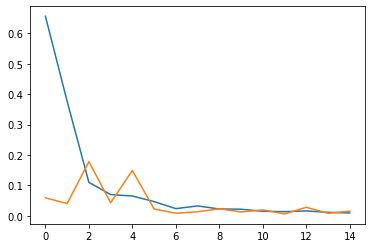

In [72]:
model=lstm(2)
train_loss=[]
val_loss=[]
for ix_epoch in range(15):
    print(f"Epoch {ix_epoch}\n---------")
    a,b=train(df, 'Close',model, 'pdd',10)
    train_loss.append(a)
    val_loss.append(b.detach().numpy())
plt.plot(train_loss)
plt.plot(val_loss)
col=['Close','n_Close']
scaler = MinMaxScaler(feature_range=(0, 1))
nas=df[df['Company']=='nasdq'].reset_index(drop=True)
X=df[df['Company']=='pdd'][['Close']].reset_index(drop=True)
X['n_Close']=nas['Close']
X = pd.DataFrame(scaler.fit_transform(X).copy(),columns=col)
X_arr, Y_df = df_conversion(X, 10)
Y_arr = np.array(Y_df['Close'])
model.eval()

res=model(torch.tensor(X_arr[:,:,1:]).float()).detach().numpy()


In [48]:
test=pd.DataFrame(Y_arr)
test['predicted']=res.reshape(-1)
import plotly.express as px
fig = px.line(test)
fig.add_vline(x=177-43, line_width=4, line_dash="dash")
fig.add_annotation(xref="paper", x=0.8, yref="paper", y=0.8, text="Test set start", showarrow=False)
fig.show()

Epoch 0
---------
Train loss: 0.554642245069974
Val loss: 0.024532847539296763
Epoch 1
---------
Train loss: 0.3338039703667164
Val loss: 0.04942893941115288
Epoch 2
---------
Train loss: 0.11443155610726939
Val loss: 0.014602961169778945
Epoch 3
---------
Train loss: 0.04261531453165743
Val loss: 0.06430833696042483
Epoch 4
---------
Train loss: 0.02617689563582341
Val loss: 0.030875238014569383
Epoch 5
---------
Train loss: 0.02386586947573556
Val loss: 0.006616131222592572
Epoch 6
---------
Train loss: 0.016110969888460305
Val loss: 0.05135837034223161
Epoch 7
---------
Train loss: 0.011654816645508012
Val loss: 0.0031746862990679786
Epoch 8
---------
Train loss: 0.012726364269231757
Val loss: 0.01720523709377657
Epoch 9
---------
Train loss: 0.010719889619698128
Val loss: 0.003479594732270181
Epoch 10
---------
Train loss: 0.009338492838044962
Val loss: 0.00755665152340654
Epoch 11
---------
Train loss: 0.011700196243408654
Val loss: 0.0037773919324870803
Epoch 12
---------
Train l

[0.012416754156110448,
 0.0044467594092098385,
 0.005085301788945019,
 0.028819794141619014,
 0.01641324858544236,
 0.0009742518239818042,
 0.052979464686806456,
 0.024493511225794053,
 0.013924047353153874,
 0.03139131622935682]

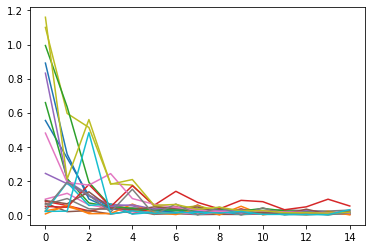

In [86]:
nas=df[df['Company']=='nasdq'].reset_index(drop=True)
res={}
term_length=10
df_pred=pd.DataFrame(index=df_close.iloc[10:, :].index)
val_mse=[]
for stock in company_lst:
    model1=lstm(2)
    train_loss=[]
    val_loss=[]
    for ix_epoch in range(15):
        print(f"Epoch {ix_epoch}\n---------")
        a,b=train(df, 'Close',model1, stock,term_length)
        train_loss.append(a)
        val_loss.append(b.detach().item())
    plt.plot(train_loss)
    plt.plot(val_loss)
    val_mse.append(b.detach().item())
    scaler = MinMaxScaler(feature_range=(0, 1))
    X=df[df['Company']==stock]
    col=['Close','n_Close']
    nas=df[df['Company']=='nasdq'].reset_index(drop=True)
    X=df[df['Company']==stock][['Close']].reset_index(drop=True)
    X['n_Close']=nas['Close']
    min_=min(X['Close'])
    max_=max(X['Close'])

    X_s = pd.DataFrame(scaler.fit_transform(X).copy(),columns=col)
    X_arr, Y_df = df_conversion(X_s, term_length)
    df_pred[stock]=model1(torch.tensor(X_arr[:,:,1:]).float()).detach().numpy()*(max_-min_)+min_
val_mse

In [90]:
print('avergae validation mse:',sum(val_mse)/len(val_mse))

avergae validation mse: 0.019094444940041966


In [25]:
df_pred

amd       apple          ba        biib         jpm        meta  \
Date                                                                            
01-18  124.406242  176.120178  204.569443  213.832535  142.311615  311.585083   
01-19  122.221313  173.548676  202.868500  212.514343  139.943161  296.180450   
01-20  120.970337  168.887909  199.875732  211.944626  138.681549  299.017090   
01-21  118.785614  170.323029  198.436096  210.706879  137.467865  292.936035   
01-24  116.597076  167.057266  193.230286  209.130508  135.341492  280.209625   
...           ...         ...         ...         ...         ...         ...   
09-23   78.908730  146.676224  131.966064  194.516632  108.443359  165.251190   
09-26   76.929581  144.992706  127.487442  192.140381  107.022820  163.409302   
09-27   75.469910  144.479828  126.148094  190.149994  105.844597  161.714539   
09-28   76.617554  145.404266  126.850029  191.025146  105.470001  161.053482   
09-29   78.844864  145.363174  130.721375  217.492554  106.833878  163.939667   

             ngg        pdd       ryaay       tesla  
Date                                                 
01-18  76.144882  59.185555  124.941635  345.367584  
01-19  75.855400  60.069786  121.803757  338.646790  
01-20  75.767830  61.749069  121.950775  330.517639  
01-21  75.596771  62.872414  121.492523  328.081512  
01-24  75.218529  61.376312  119.458527  313.818665  
...          ...        ...         ...         ...  
09-23  66.376060  63.936508   66.527725  261.095825  
09-26  64.788811  62.312561   64.296310  249.997818  
09-27  62.726639  62.664886   62.513359  248.608032  
09-28  60.637215  62.746635   61.396172  252.577576  
09-29  60.401936  63.562424   62.957573  258.368927  

[177 rows x 10 columns]

In [26]:
df_pred_r=(df_pred-df_pred.shift(periods=1))/df_pred.shift(periods=1)
df_pred_r

amd     apple        ba      biib       jpm      meta       ngg  \
Date                                                                          
01-18       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
01-19 -0.017563 -0.014601 -0.008315 -0.006165 -0.016643 -0.049440 -0.003802   
01-20 -0.010235 -0.026856 -0.014752 -0.002681 -0.009015  0.009577 -0.001154   
01-21 -0.018060  0.008497 -0.007203 -0.005840 -0.008752 -0.020337 -0.002258   
01-24 -0.018424 -0.019174 -0.026234 -0.007481 -0.015468 -0.043444 -0.005003   
...         ...       ...       ...       ...       ...       ...       ...   
09-23 -0.049436 -0.008572 -0.022367 -0.003432 -0.009553 -0.006254 -0.010764   
09-26 -0.025081 -0.011478 -0.033938 -0.012216 -0.013099 -0.011146 -0.023913   
09-27 -0.018974 -0.003537 -0.010506 -0.010359 -0.011009 -0.010371 -0.031829   
09-28  0.015207  0.006398  0.005564  0.004602 -0.003539 -0.004088 -0.033310   
09-29  0.029070 -0.000283  0.030519  0.138555  0.012931  0.017921 -0.003880   

            pdd     ryaay     tesla  
Date                                 
01-18       NaN       NaN       NaN  
01-19  0.014940 -0.025115 -0.019460  
01-20  0.027956  0.001207 -0.024005  
01-21  0.018192 -0.003758 -0.007371  
01-24 -0.023796 -0.016742 -0.043473  
...         ...       ...       ...  
09-23  0.009413 -0.024241 -0.036336  
09-26 -0.025399 -0.033541 -0.042505  
09-27  0.005654 -0.027730 -0.005559  
09-28  0.001305 -0.017871  0.015967  
09-29  0.013001  0.025432  0.022929  

[177 rows x 10 columns]

In [27]:
df_return

Company       amd     apple        ba      biib       jpm      meta       ngg  \
Date                                                                            
01-04   -0.038738 -0.012692  0.027759 -0.009871  0.037910 -0.005937  0.001936   
01-05   -0.057264 -0.026600 -0.002621 -0.010177 -0.018282 -0.036728 -0.009662   
01-06    0.000588 -0.016693 -0.008119 -0.008233  0.010624  0.025573 -0.010035   
01-07   -0.031050  0.000988  0.019684 -0.019806  0.009908 -0.002015  0.008166   
01-10    0.000000  0.000116 -0.028724  0.011651  0.000957 -0.011212 -0.000978   
...           ...       ...       ...       ...       ...       ...       ...   
09-23   -0.022158 -0.015124 -0.053709 -0.014156 -0.018613 -0.016874 -0.039891   
09-26   -0.024426  0.002260 -0.029864 -0.010264 -0.021532 -0.028773 -0.049361   
09-27    0.013122  0.006566  0.001335  0.010421 -0.008802 -0.014446 -0.038289   
09-28    0.017716 -0.012652  0.046506  0.398503  0.020217  0.053646  0.026607   
09-29   -0.061732 -0.049119 -0.060776 -0.044575 -0.016946 -0.036721 -0.021188   

Company       pdd     ryaay     tesla  
Date                                   
01-04   -0.111943  0.024521 -0.041833  
01-05   -0.025893  0.011004 -0.053471  
01-06    0.074181  0.012245 -0.021523  
01-07    0.072319  0.039337 -0.035447  
01-10    0.019499 -0.000172  0.030342  
...           ...       ...       ...  
09-23   -0.053735 -0.028749 -0.045948  
09-26    0.010158 -0.031840  0.002470  
09-27    0.005440 -0.025616  0.025108  
09-28    0.032628  0.016113  0.017212  
09-29   -0.035090 -0.038057 -0.068101  

[186 rows x 10 columns]

In [31]:
### Avg predicted return error of past n days:
def cal_mean_return_error(actual,pred,n):
    a=actual-pred
    tmp=a.copy()
    for i in range(n-1):
        a=a+tmp.shift(periods=i+1)
    return a.shift(1)/10
mean_return_error_10=cal_mean_return_error(df_return,df_pred_r,10)

In [32]:
mean_return_error_10=mean_return_error_10.iloc[20:,:]

In [33]:
mean_return_error_10.loc['09-28',:]

Company
amd      0.009055
apple    0.009096
ba       0.003497
biib     0.004067
jpm     -0.001100
meta    -0.001016
ngg     -0.006357
pdd     -0.003688
ryaay    0.000760
tesla    0.010733
Name: 09-28, dtype: float64

In [37]:
risk_free=0.0404 #for Oct 26 2022
stock_return  = df_return.copy()
def get_optimal_portfolio(num=10000,date='09-28',method='mv'):
    random_p = np.empty((num, 12))
    ### set a random seed so that optimal potfolio might not change over consecutive date
    np.random.seed(7) 
    for i in range(num):
        random10=np.random.random(10)
        random_weight=random10/np.sum(random10)
        mean_return=stock_return.loc[:date,:].mul(random_weight,axis=1).sum(axis=1).mean()
        annual_return=mean_return * 252
#         annual_return=(1+mean_return)**stock_return.loc[:date,:].shape[0]-1
        cov_mat = stock_return.loc[:date,:].cov()
        cov_mat_annual = cov_mat * 252
        random_volatility=np.sqrt(np.dot(random_weight.T,np.dot(cov_mat_annual,random_weight)))
        pred_return=df_pred_r.loc[date,:].mul(random_weight).sum()
        return_error=mean_return_error_10.loc[date,:].mul(random_weight).sum()
        neg_sharpe_ratio = -(annual_return-risk_free)/random_volatility
    # Minimize var and maximize expected portfolio return and sample period’s abnormal return
        if method == 'mv':
            obj_f=random_volatility-2*pred_return-2*return_error
        elif method == 'sharpe':
            obj_f= neg_sharpe_ratio-10*pred_return-10*return_error
            
        random_p[i][:10]=random_weight
        random_p[i][10]=annual_return
        random_p[i][11]=obj_f
      
    RandomPortfolios=pd.DataFrame(random_p)
    RandomPortfolios.columns=[company +'_weight' for company in company_lst]+['Returns','Obj']

    min_index = RandomPortfolios.Obj.idxmin()

    RandomPortfolios.plot('Obj', 'Returns', kind='scatter', alpha=0.3)
    x = RandomPortfolios.loc[min_index,'Obj']
    y = RandomPortfolios.loc[min_index,'Returns']
    plt.scatter(x, y, color='red')

    plt.text(np.round(x,4),np.round(y,4),(np.round(x,4),np.round(y,4)),ha='left',va='bottom',fontsize=10)
    plt.show()

    numstocks = 10

    GMV_weights = np.array(RandomPortfolios.iloc[min_index, 0:numstocks])

    return GMV_weights

In [35]:
df_close.iloc[-43:, :]

Company         amd       apple          ba        biib         jpm  \
Date                                                                  
08-01     96.779999  161.285965  169.070007  209.259995  113.197227   
08-02     99.290001  159.788040  163.279999  209.149994  111.433014   
08-03     98.089996  165.899567  166.639999  213.600006  112.602547   
08-04    103.910004  165.580002  166.500000  217.300003  111.363632   
08-05    102.309998  165.350006  165.039993  218.199997  114.733490   
08-08    100.070000  164.869995  165.889999  217.559998  113.335983   
08-09     95.540001  164.919998  164.850006  217.589996  114.356850   
08-10     99.050003  169.240005  169.020004  221.039993  117.340164   
08-11     98.120003  168.490005  167.880005  218.220001  119.074646   
08-12    100.830002  172.100006  169.990005  220.990005  121.046997   
08-15    101.010002  173.190002  170.470001  222.380005  121.374069   
08-16    100.199997  173.029999  172.080002  219.639999  122.533691   
08-17     98.269997  174.550003  167.199997  217.580002  121.502914   
08-18    100.440002  174.149994  168.690002  216.339996  120.561340   
08-19     95.949997  171.520004  162.919998  214.089996  117.578033   
08-22     92.839996  167.570007  158.979996  207.699997  115.635414   
08-23     92.489998  167.229996  160.070007  202.809998  114.495605   
08-24     92.730003  167.529999  163.600006  201.779999  114.773132   
08-25     97.180000  170.029999  169.380005  204.830002  117.498749   
08-26     91.180000  163.619995  164.529999  198.589996  113.653145   
08-29     88.489998  161.380005  165.419998  197.110001  113.375633   
08-30     86.940002  158.910004  162.210007  196.080002  113.395462   
08-31     84.870003  157.220001  160.250000  195.380005  112.721489   
09-01     82.330002  157.960007  153.660004  199.789993  113.494568   
09-02     80.239998  155.809998  151.820007  196.029999  112.701660   
09-06     78.720001  154.529999  152.389999  194.690002  112.731392   
09-07     79.610001  155.960007  155.949997  200.669998  114.872246   
09-08     82.779999  154.460007  157.789993  207.979996  117.548302   
09-09     85.449997  157.369995  157.520004  211.839996  118.113243   
09-12     84.639999  163.429993  158.720001  212.880005  119.510742   
09-13     77.029999  153.839996  147.309998  203.910004  115.357895   
09-14     77.449997  155.309998  149.259995  204.110001  115.090294   
09-15     76.660004  152.369995  149.779999  206.720001  116.824776   
09-16     76.510002  150.699997  144.289993  208.259995  116.041779   
09-19     76.769997  154.479996  144.880005  209.259995  117.112206   
09-20     75.250000  156.899994  145.940002  204.199997  114.802864   
09-21     74.480003  153.720001  143.289993  199.339996  111.492477   
09-22     69.500000  152.740005  138.710007  200.619995  110.223831   
09-23     67.959999  150.429993  131.259995  197.779999  108.172188   
09-26     66.300003  150.770004  127.339996  195.750000  105.843025   
09-27     67.169998  151.759995  127.510002  197.789993  104.911362   
09-28     68.360001  149.839996  133.440002  276.609985  107.032387   
09-29     64.139999  142.479996  125.330002  264.279999  105.218620   

Company        meta        ngg        pdd      ryaay       tesla  
Date                                                              
08-01    159.929993  69.379997  47.689999  74.000000  297.276672  
08-02    160.190002  70.070000  48.980000  71.620003  300.586670  
08-03    168.800003  69.830002  49.650002  73.699997  307.396667  
08-04    170.570007  69.610001  51.259998  74.169998  308.633331  
08-05    167.110001  68.550003  50.250000  74.000000  288.170013  
08-08    170.250000  69.320000  47.669998  74.529999  290.423340  
08-09    168.529999  70.080002  47.330002  72.940002  283.333344  
08-10    178.339996  70.239998  47.259998  74.790001  294.356659  
08-11    177.490005  69.470001  49.619999  74.639999  286.630005  
08-12    180.500000  70.419998  48.799999  75.190002  300.029999  


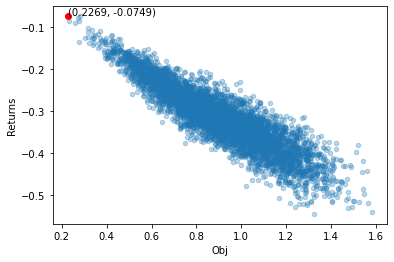

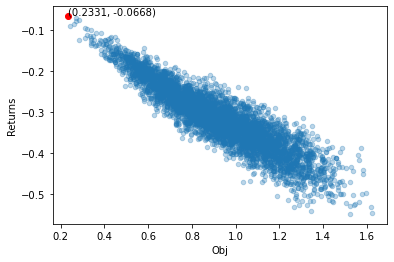

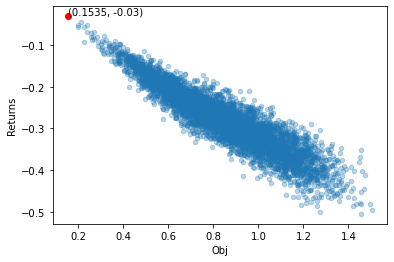

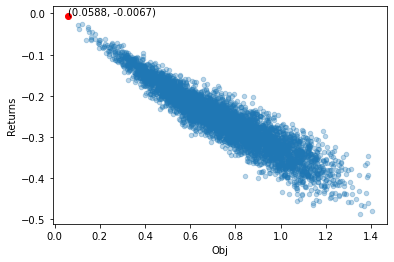

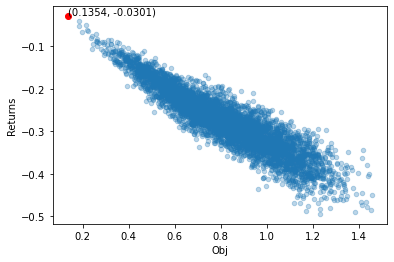

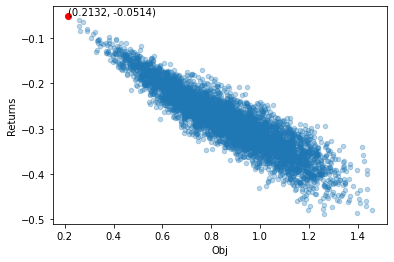

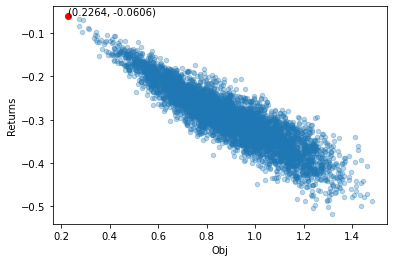

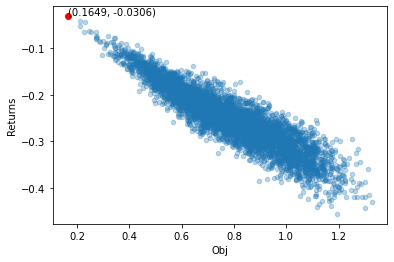

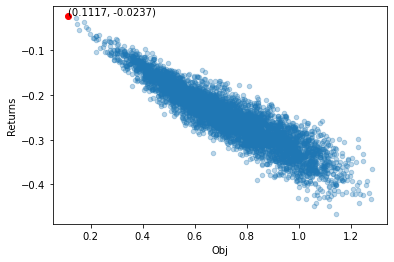

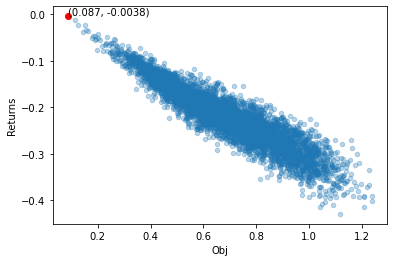

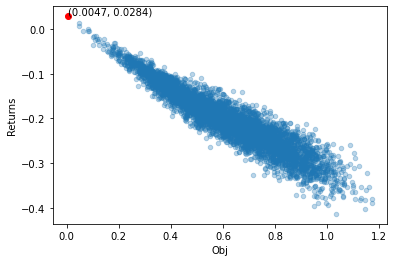

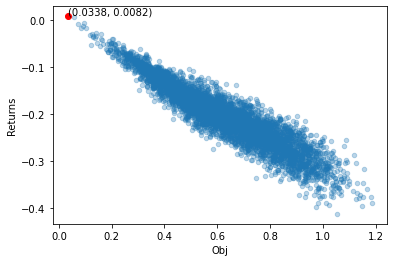

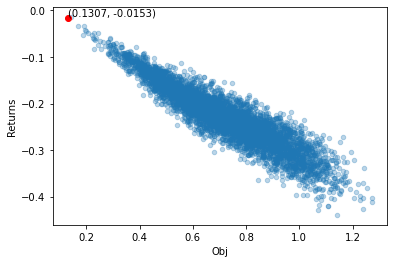

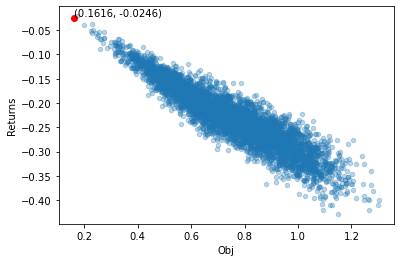

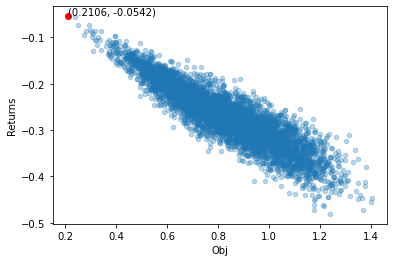

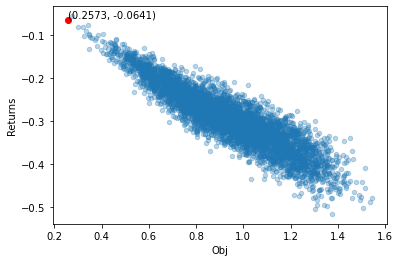

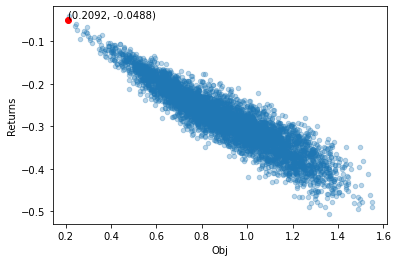

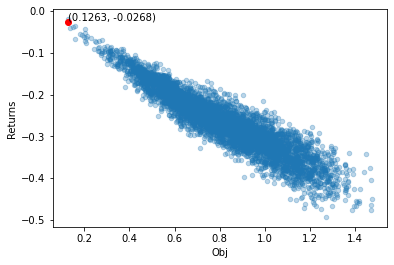

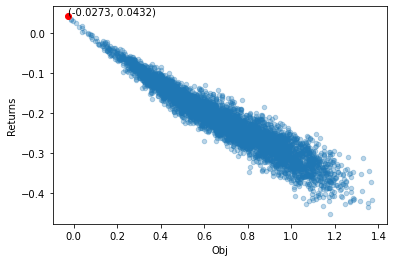

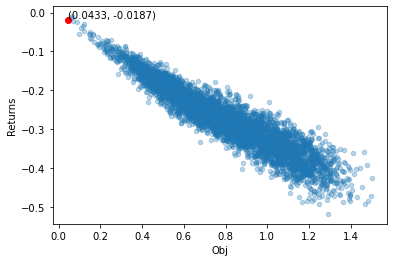

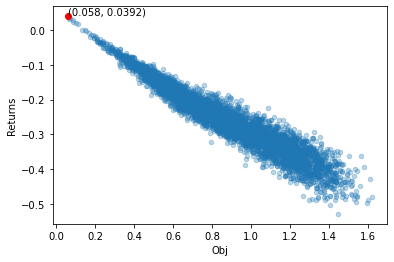

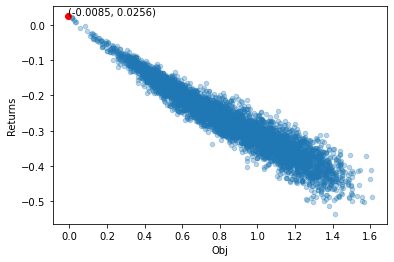

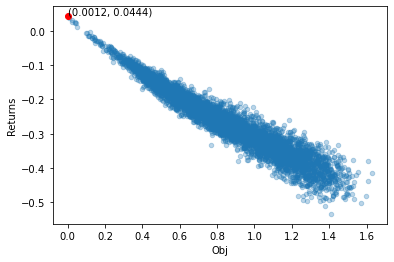

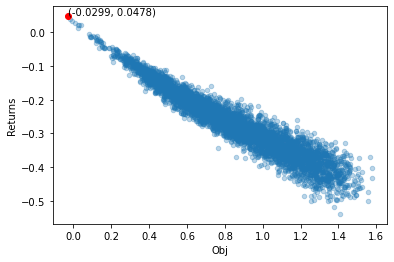

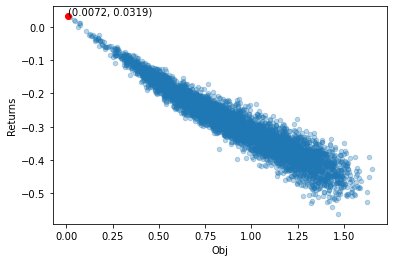

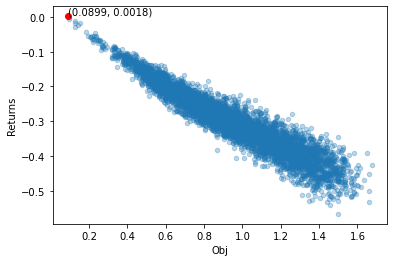

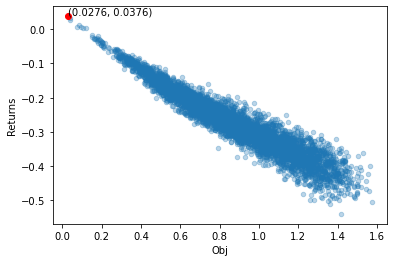

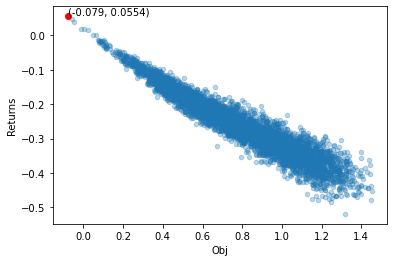

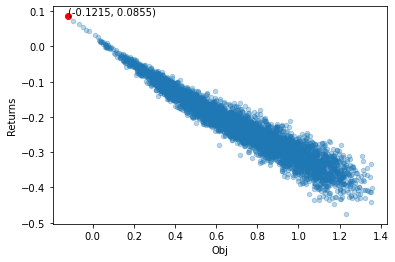

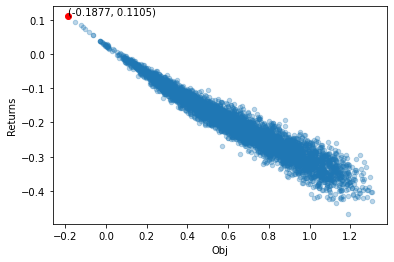

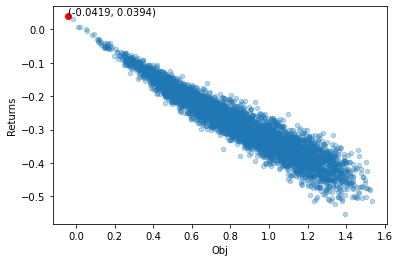

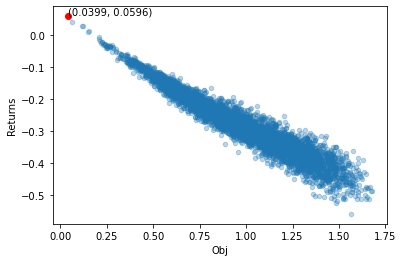

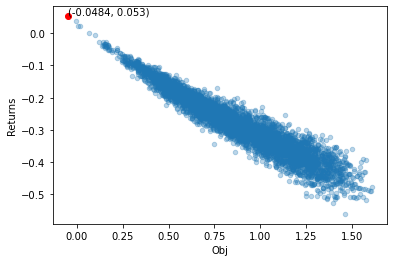

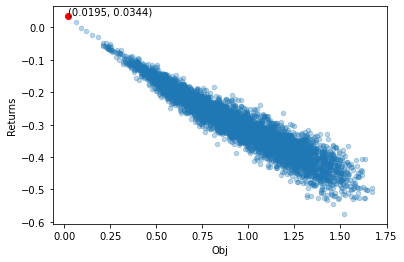

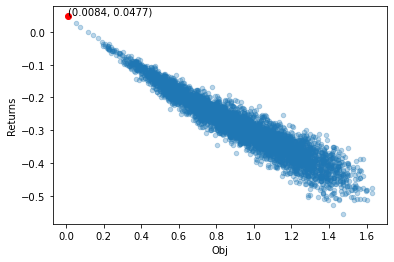

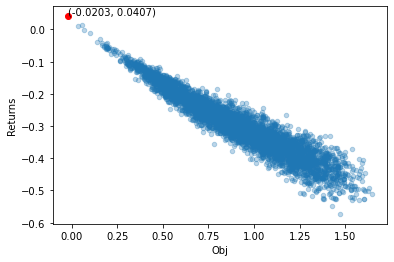

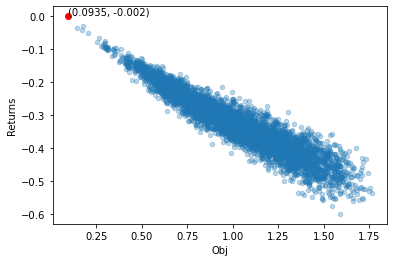

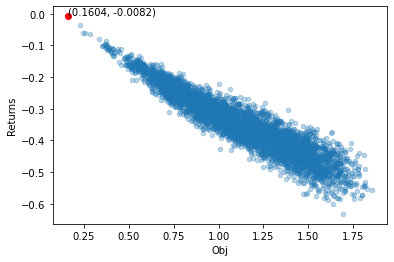

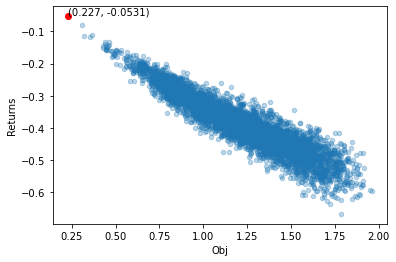

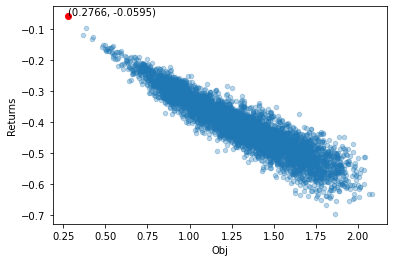

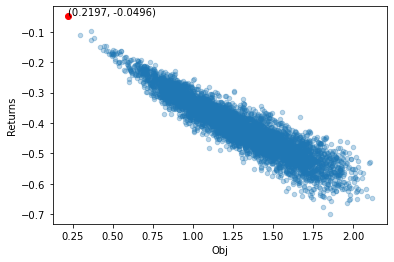

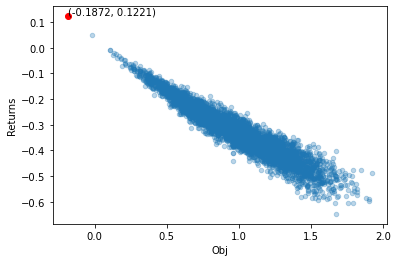

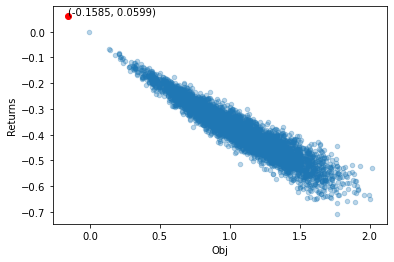

In [38]:
#### get daily optimal weight for Aug and Sep
weight={}
date_list=df_close.iloc[-43:, :].index
for date in date_list:
    weight[date]=get_optimal_portfolio(num=5000,date=date,method='sharpe')

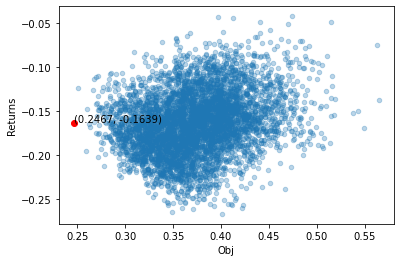

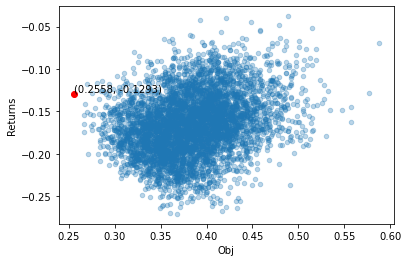

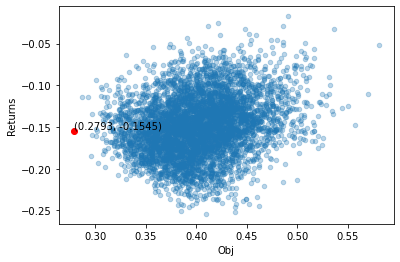

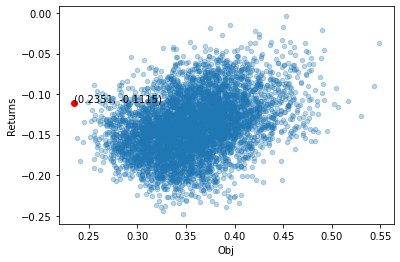

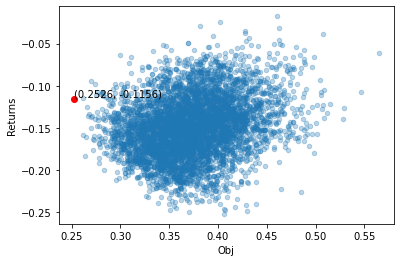

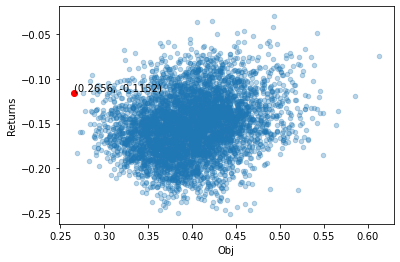

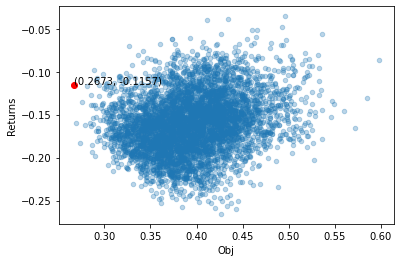

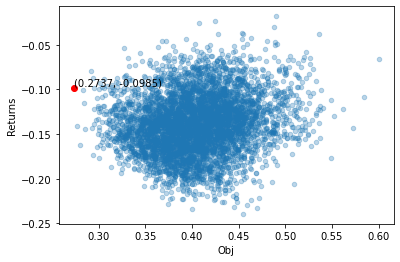

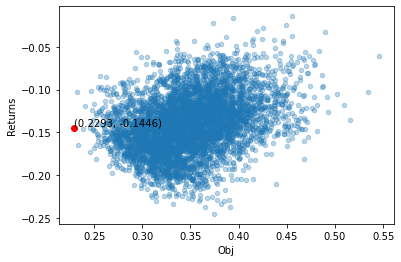

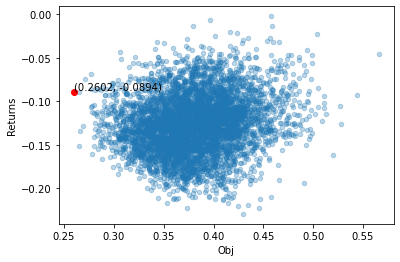

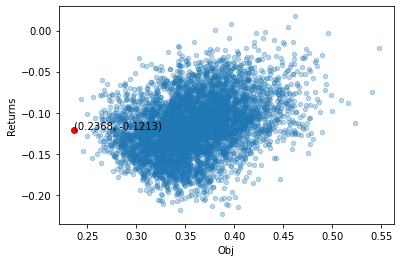

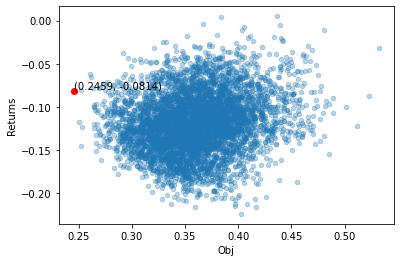

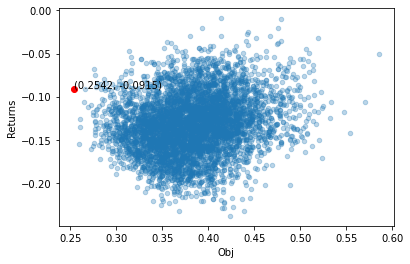

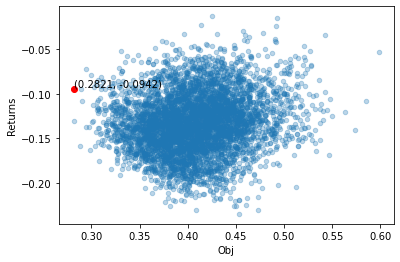

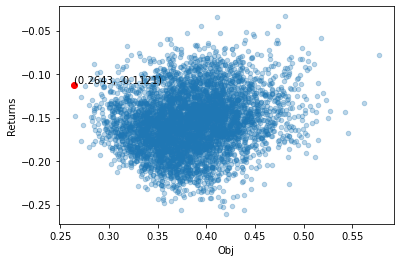

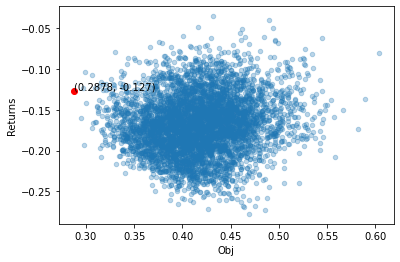

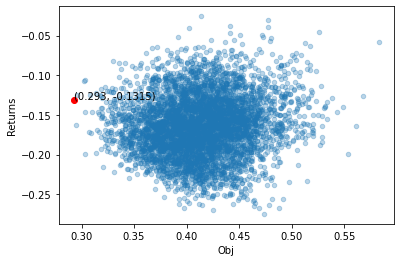

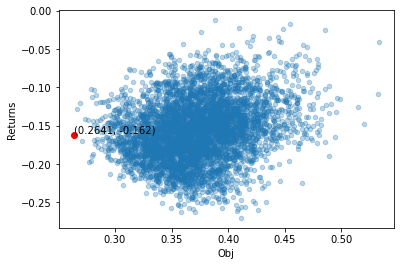

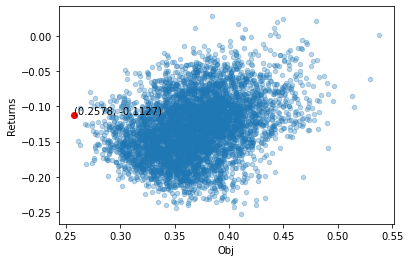

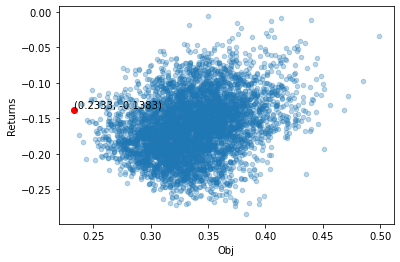

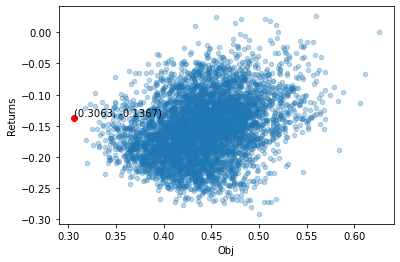

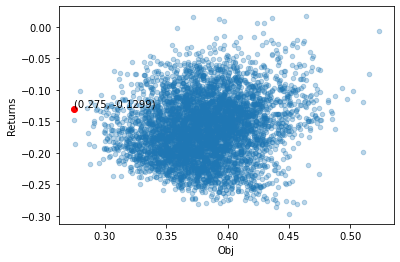

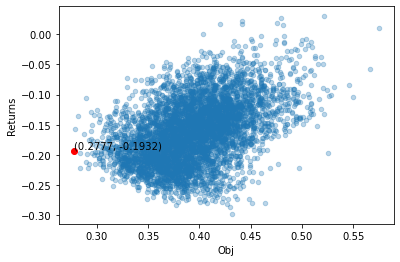

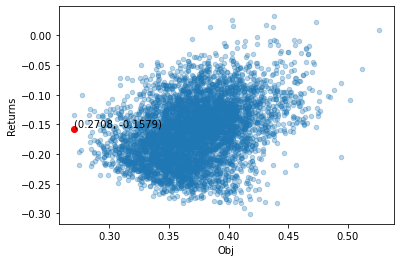

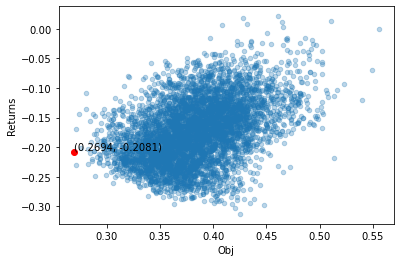

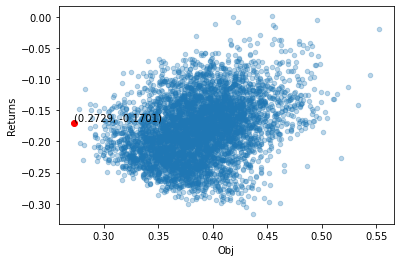

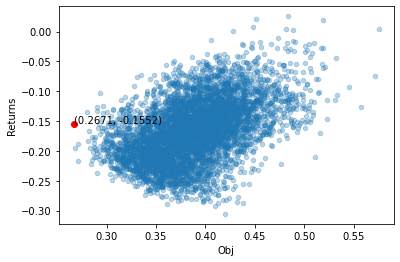

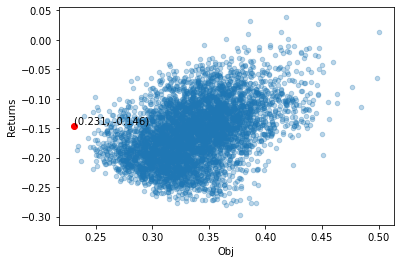

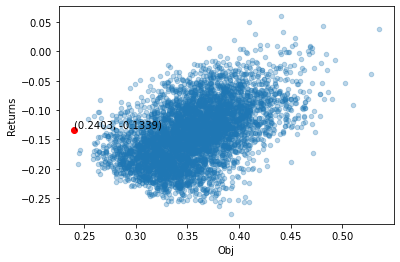

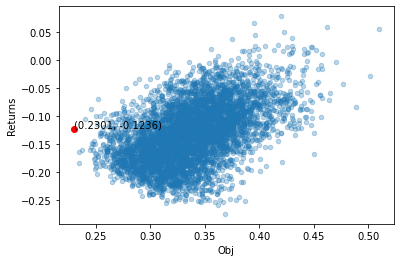

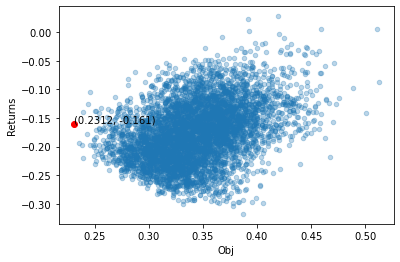

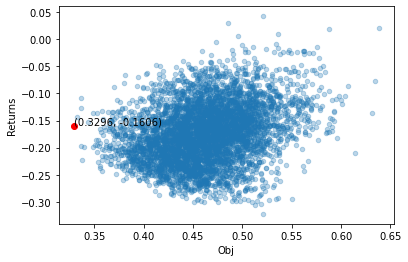

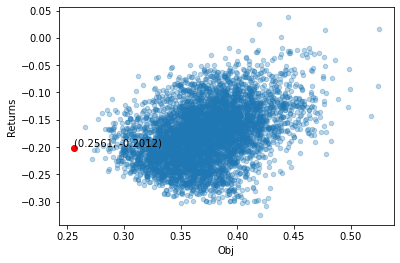

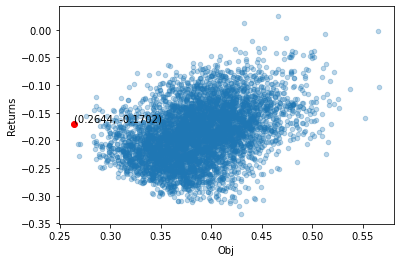

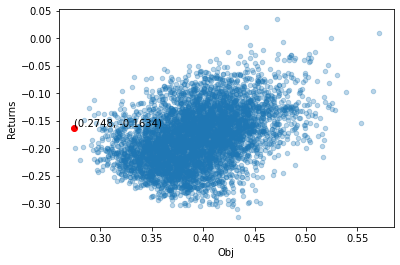

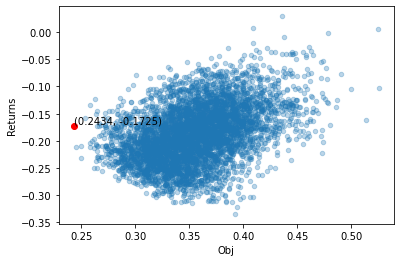

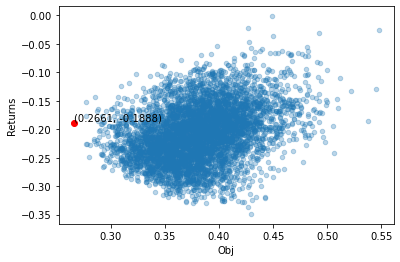

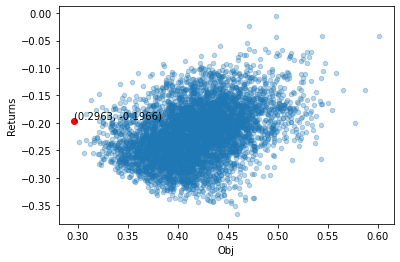

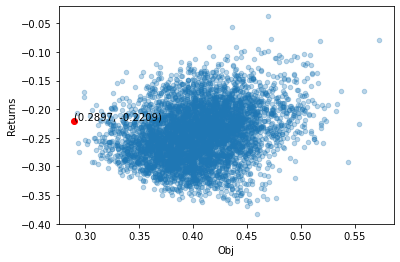

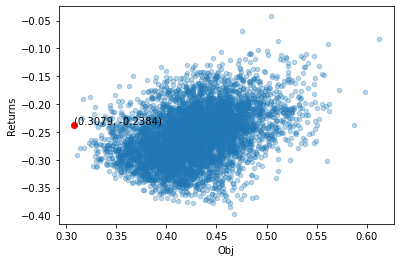

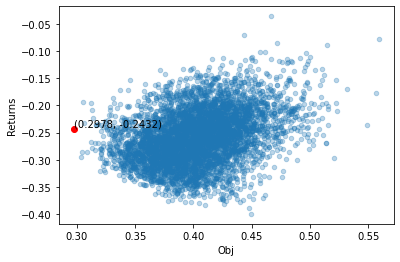

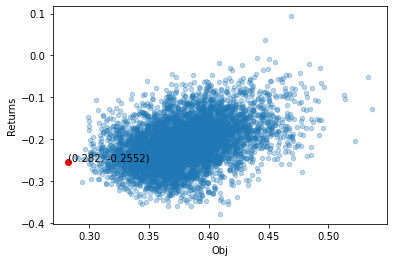

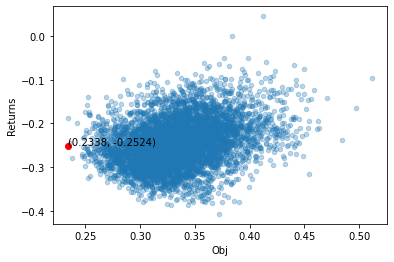

In [211]:
#### get daily optimal weight for Aug and Sep
weight_2={}
date_list=df_close.iloc[-43:, :].index
for date in date_list:
    weight_2[date]=get_optimal_portfolio(num=5000,date=dat,method='mv')


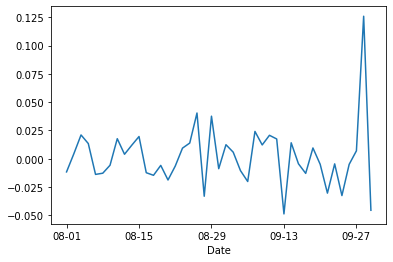

In [39]:
### Return for Aug and Sep (Sharpe + Prediction)
WeightedReturns = stock_return.loc['08-01':,:]*pd.DataFrame.from_dict(weight, orient='index',columns=company_lst)
df_return['Portfolio'] = WeightedReturns.sum(axis=1)
df_return.loc['08-01':,:].Portfolio.plot()
plt.show()

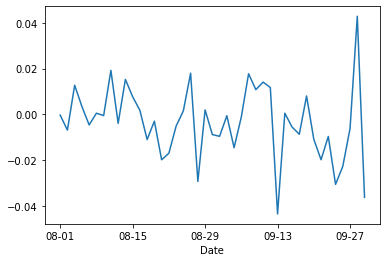

In [212]:
### Return for Aug and Sep (MV + Prediction)
WeightedReturns = stock_return.loc['08-01':,:]*pd.DataFrame.from_dict(weight_2, orient='index',columns=company_lst)
df_return['Portfolio'] = WeightedReturns.sum(axis=1)
df_return.loc['08-01':,:].Portfolio.plot()
plt.show()

In [40]:
pd.DataFrame.from_dict(weight, orient='index',columns=company_lst)

amd     apple        ba      biib       jpm      meta       ngg  \
08-01  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
08-02  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
08-03  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
08-04  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
08-05  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
08-08  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
08-09  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
08-10  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
08-11  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
08-12  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
08-15  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
08-16  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
08-17  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
08-18  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
08-19  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
08-22  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
08-23  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
08-24  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
08-25  0.071277  0.233498  0.051031  0.006936  0.078675  0.013549  0.237709   
08-26  0.006462  0.075337  0.269599  0.092737  0.024221  0.017155  0.045740   
08-29  0.006462  0.075337  0.269599  0.092737  0.024221  0.017155  0.045740   
08-30  0.006462  0.075337  0.269599  0.092737  0.024221  0.017155  0.045740   
08-31  0.006462  0.075337  0.269599  0.092737  0.024221  0.017155  0.045740   
09-01  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
09-02  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
09-06  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
09-07  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
09-08  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
09-09  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
09-12  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
09-13  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
09-14  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
09-15  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
09-16  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
09-19  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
09-20  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
09-21  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
09-22  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
09-23  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
09-26  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
09-27  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
09-28  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   
09-29  0.011099  0.161078  0.059873  0.280697  0.037937  0.010310  0.034807   

            pdd     ryaay     tesla  
08-01  0.249542  0.011794  0.142863  
08-02  0.249542  0.011794  0.142863  
08-03  0.249542  0.011794  0.142863  
08-04  0.249542  0.011794  0.142863  
08-05  0.249542  0.011794  0.142863  
08-08  0.249542  0.011794  0.142863  
08-09  0.249542  0.011794  0.142863  
08-10  0.249542  0.011794  0.142863  
08-11  0.249542  0.011794  0.142863  
08-12  0.249542  0.011794  0.142863  
08-15  0.249542  0.011794  0.142863  
08-16  0.249542  0.011794  0.142863  
08-17  0.249542  0.011794  0.142863  
08-

In [213]:
pd.DataFrame.from_dict(weight_2, orient='index',columns=company_lst)

amd     apple        ba      biib       jpm      meta       ngg  \
08-01  0.031375  0.031028  0.062044  0.047855  0.275893  0.072903  0.308017   
08-02  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
08-03  0.031375  0.031028  0.062044  0.047855  0.275893  0.072903  0.308017   
08-04  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
08-05  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
08-08  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
08-09  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
08-10  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
08-11  0.031375  0.031028  0.062044  0.047855  0.275893  0.072903  0.308017   
08-12  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
08-15  0.031375  0.031028  0.062044  0.047855  0.275893  0.072903  0.308017   
08-16  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
08-17  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
08-18  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
08-19  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
08-22  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
08-23  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
08-24  0.031375  0.031028  0.062044  0.047855  0.275893  0.072903  0.308017   
08-25  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
08-26  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
08-29  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
08-30  0.020147  0.105909  0.052513  0.153507  0.153826  0.037340  0.249572   
08-31  0.022738  0.031973  0.127332  0.155528  0.243801  0.001557  0.164371   
09-01  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
09-02  0.031375  0.031028  0.062044  0.047855  0.275893  0.072903  0.308017   
09-06  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
09-07  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
09-08  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
09-09  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
09-12  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
09-13  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
09-14  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
09-15  0.031375  0.031028  0.062044  0.047855  0.275893  0.072903  0.308017   
09-16  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
09-19  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
09-20  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
09-21  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
09-22  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
09-23  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
09-26  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
09-27  0.007521  0.096642  0.169688  0.227019  0.133981  0.021346  0.216091   
09-28  0.031375  0.031028  0.062044  0.047855  0.275893  0.072903  0.308017   
09-29  0.022738  0.031973  0.127332  0.155528  0.243801  0.001557  0.164371   

            pdd     ryaay     tesla  
08-01  0.014181  0.023442  0.133261  
08-02  0.024072  0.049842  0.053797  
08-03  0.014181  0.023442  0.133261  
08-04  0.024072  0.049842  0.053797  
08-05  0.024072  0.049842  0.053797  
08-08  0.024072  0.049842  0.053797  
08-09  0.024072  0.049842  0.053797  
08-10  0.024072  0.049842  0.053797  
08-11  0.014181  0.023442  0.133261  
08-12  0.024072  0.049842  0.053797  
08-15  0.014181  0.023442  0.133261  
08-16  0.024072  0.049842  0.053797  
08-17  0.024072  0.049842  0.053797  
08-